# Приоритизация гипотез, запуск A/B-теста и анализ результатов

### Цель проекта: приоретизировать имеющиеся гипотезы. Затем проанализировать результаты А/В-теста.

### Описание данных
#### Данные для первой части
Файл /datasets/hypothesis.csv. Скачать датасет
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
#### Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Описание прокта:
Вместе с отделом маркетинга подготовить список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from scipy import stats as st

## Приоритезация гипотез

In [2]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 150
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

Приоретизировали гипотезы фреймворком ICE. Из результатов видно что лидером является гипотеза о запуске акции со скидкой на товар. Так же к приоритетным можно отнести гипотезы привлечении двух новых каналов трафика и добалвении вормы подписки на все основные страницы.

In [3]:
hypothesis['ICE']=round(((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']),2)
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Фреймворк RICE

Приоритезировав гипотезы фреймворком RICE мы получили следующие результаты. Наиболее приоритетной оказалась гипотеза о добавлении формы подписки на все основные страницы. Гипотеза лидирует с большим отрывом. Далее идут гипотезы о добавлении блока рекомендаций на сайт и добавлении двух новых каналов привлечения.

In [4]:
hypothesis['RICE']=(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод

Мы видим что при приоритезации гипотез двумя разными способами результат немного отличается. Используя фреймворк ICE приоритетными оказались следующие гипотезы: 1)гипотеза о запуске акции со скидкой на товар 2)гипотеза о привлечении двух новых каналов трафика 3) гипотеза о добалвении формы подписки на все основные страницы.Используя фреймворк RICE приоритетными оказались следующие гипотезы: 1)гипотеза о добавлении формы подписки на все основные страницы 2)гипотезф о добавлении блока рекомендаций на сайт 3)гипотеза о добавлении двух новых каналов привлечения. Это происходит по той причине, что ICE учитывает только насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта, уверенность,что это изменение повлияет на пользователей именно так и сколько стоит протестировать эту гипотезу. Фреймворк RICE кроме этого учитывает еще скольких пользователей затронет изменение.

## Анализ A/B-теста

Загрузили данные. Проверили их на пропуски и дубликаты. Поменяти тип данных во временных столбцах.

В нашем  А/В тесте две группы;

Даты начала и окончания теста - 01-08-2019 и 31-08-2019;

Пользователей в каждой группе (по таблице с заказами)- группа А:503, группа В:586;

In [5]:
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')
print(visitors.isna().sum().sum())
print(orders.isna().sum().sum())
print(visitors.drop_duplicates())
print(orders.drop_duplicates())
visitors.info()
visitors['date']=pd.to_datetime(visitors['date'])
visitors['visitors']=visitors['visitors'].astype(float)
orders.info()
orders['date']=pd.to_datetime(orders['date'])
orders['revenue']=orders['revenue'].astype(float)
display(orders)
display(visitors)
ordersA=orders[['visitorId','group']][orders['group']=='A']
print(ordersA.nunique())
ordersB=orders[['visitorId','group']][orders['group']=='B']
print(ordersB.nunique())

0
0
          date group  visitors
0   2019-08-01     A       719
1   2019-08-02     A       619
2   2019-08-03     A       507
3   2019-08-04     A       717
4   2019-08-05     A       756
..         ...   ...       ...
57  2019-08-27     B       720
58  2019-08-28     B       654
59  2019-08-29     B       531
60  2019-08-30     B       490
61  2019-08-31     B       718

[62 rows x 3 columns]
      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     1650     B
1        2804400009  3642806036  2019-08-15      730     B
2        2961555356  4069496402  2019-08-15      400     A
3        3797467345  1196621759  2019-08-15     9759     B
4        2282983706  2322279887  2019-08-15     2308     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14     6490     B
1193     2203539145   370388673  2019-08-14     3190     A
1194     1807773912   573423106  2019-08-14    10550     A
1195     19

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650.0,B
1,2804400009,3642806036,2019-08-15,730.0,B
2,2961555356,4069496402,2019-08-15,400.0,A
3,3797467345,1196621759,2019-08-15,9759.0,B
4,2282983706,2322279887,2019-08-15,2308.0,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490.0,B
1193,2203539145,370388673,2019-08-14,3190.0,A
1194,1807773912,573423106,2019-08-14,10550.0,A
1195,1947021204,1614305549,2019-08-14,100.0,A


,date,group,visitors
0,2019-08-01,A,719.0
1,2019-08-02,A,619.0
2,2019-08-03,A,507.0
3,2019-08-04,A,717.0
4,2019-08-05,A,756.0
...,...,...,...
57,2019-08-27,B,720.0
58,2019-08-28,B,654.0
59,2019-08-29,B,531.0
60,2019-08-30,B,490.0


visitorId    503
group          1
dtype: int64
visitorId    586
group          1
dtype: int64


Проверив пользователей на предмет участия в обеих тестовых группах, мы обнаружили что 58 пользователя принимали участие и в группе А и в группе В. Мы приняли решение избавиться от таких пользователей. В итоге количество участников в группах изменилось. Пользователей в каждой группе (по таблице с заказами)- группа А:445, группа В:528;

In [6]:
visitor_id=ordersA.merge(ordersB,right_on='visitorId',left_on='visitorId',how='inner')
#visitot_id=visitor_id['visitorId']
print(visitor_id.nunique())
orders=orders[~orders['visitorId'].isin(visitor_id['visitorId'])]
orders
ordersA=orders[['visitorId','group']][orders['group']=='A']
print(ordersA.nunique())
ordersB=orders[['visitorId','group']][orders['group']=='B']
print(ordersB.nunique())

visitorId    58
group_x       1
group_y       1
dtype: int64
visitorId    445
group          1
dtype: int64
visitorId    528
group          1
dtype: int64


### Подготовка данных

1)Создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавляемся от дубликатов методом drop_duplicates()

2)Объявляем переменную ordersAggregated, содержащую:
-дату;
-группу A/B-теста;
-число уникальных заказов в группе теста по указанную дату включительно;
-число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
-суммарную выручку заказов в группе теста по указанную дату включительно

3)Объявляем переменную visitorsAggregated, содержащую:
-дату;
-группу A/B-теста;
-количество уникальных посетителей в группе теста по указанную дату включительно

4)ordersAggregated и visitorsAggregated осортируем по столбцам 'date', 'group' в указанном порядке

5)Определяем переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

6)Присваиваем столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [7]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779.0,719.0
1,2019-08-01,B,17,17,59758.0,713.0
2,2019-08-02,A,42,36,234381.0,1338.0
3,2019-08-02,B,40,39,221801.0,1294.0
4,2019-08-03,A,66,60,346854.0,1845.0


Создаем переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраняем данные о датах, выручке и числе заказов в группах A и B

In [8]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors']]
display(cumulativeRevenueA)
display(cumulativeRevenueB)

,date,revenue,orders,visitors
0,2019-08-01,142779.0,23,719.0
2,2019-08-02,234381.0,42,1338.0
4,2019-08-03,346854.0,66,1845.0
6,2019-08-04,388030.0,77,2562.0
8,2019-08-05,474413.0,99,3318.0
10,2019-08-06,515332.0,114,3985.0
12,2019-08-07,638580.0,130,4629.0
14,2019-08-08,727219.0,144,5239.0
16,2019-08-09,861456.0,155,5856.0
18,2019-08-10,1013731.0,170,6262.0


,date,revenue,orders,visitors
1,2019-08-01,59758.0,17,713.0
3,2019-08-02,221801.0,40,1294.0
5,2019-08-03,288850.0,54,1803.0
7,2019-08-04,385740.0,68,2573.0
9,2019-08-05,475648.0,89,3280.0
11,2019-08-06,690490.0,112,3935.0
13,2019-08-07,909654.0,135,4644.0
15,2019-08-08,1059795.0,157,5298.0
17,2019-08-09,1162961.0,176,5908.0
19,2019-08-10,1268123.0,198,6277.0


### График кумулятивной выручки по группам

Построив график кумулятивной выручки по группам мы видим следующее. В начале экспериманта обе группы имели схожие данные. Затем группа В не на долго вырвалась вперед. В какойто момент группа А сровнялась с группой В. Но затем Группа В сделала резкий скачек и дальше продолжила плавный рост. Группа А же растет весь период достаточно плавно. 

Можно предполажить что имеют влияние чеки с аномально большими суммами, что и могло привести к таким результатам.

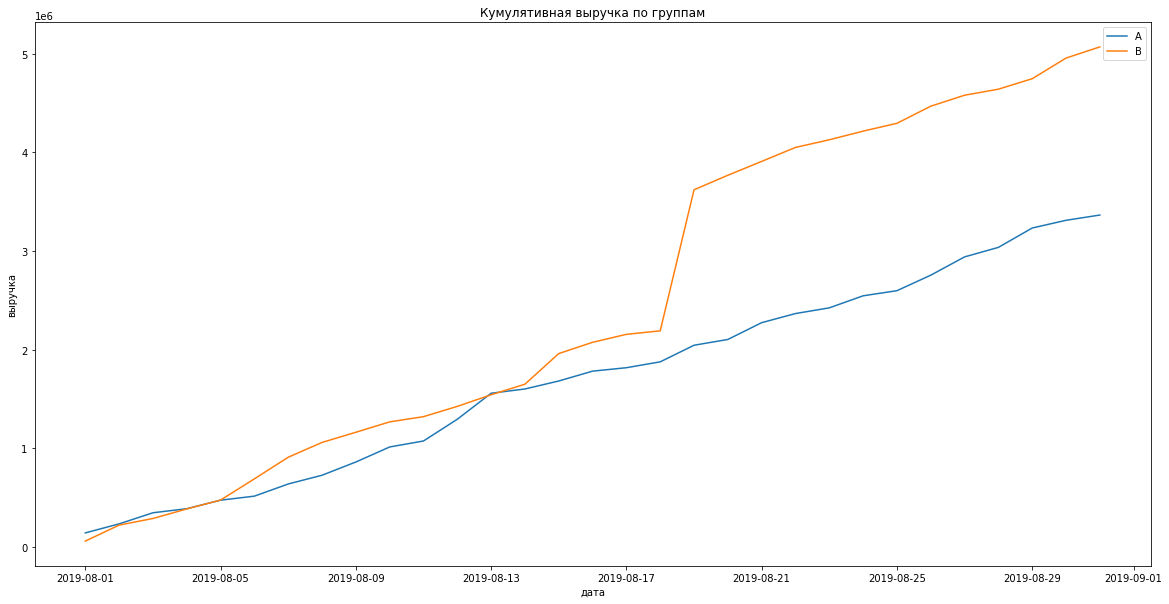

In [9]:
plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по группам')
plt.show()

### График кумулятивного среднего чека по группам

Судя по графику кумулятивный средний чек по группе В продолжает колебаться, имеет резкие скачки, а в дальнейшем медленный спад. Группа А более стабильна. Если в начале мы видим колебания, то в дальнейшем был небольшой провал и затем плавный рост. Но делать какие либо выводы пока рано.

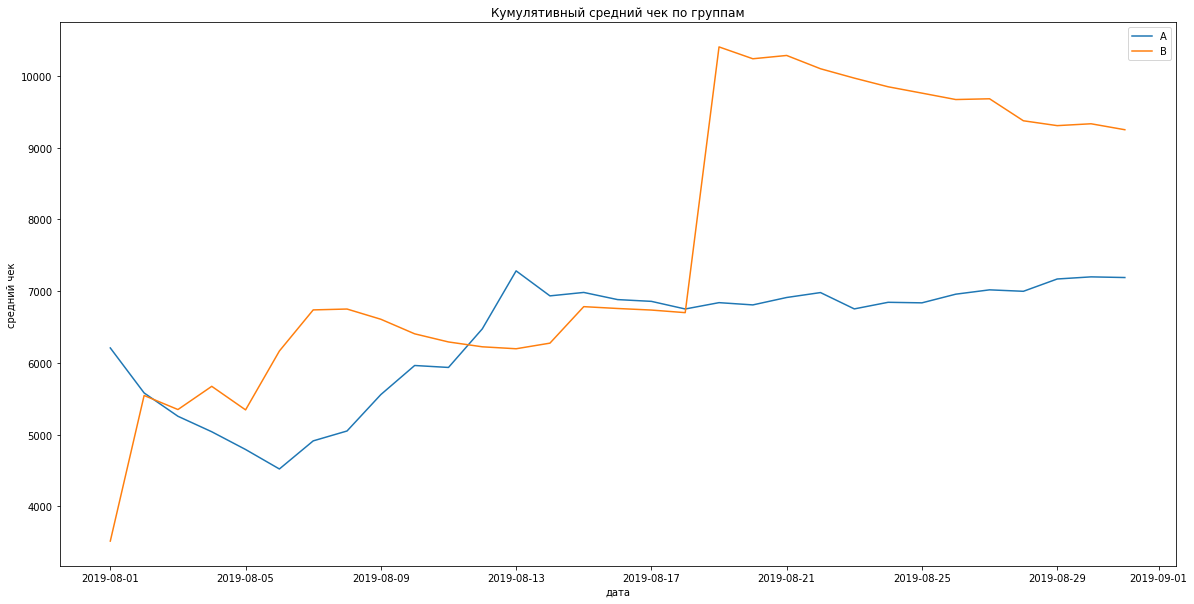

In [10]:
plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.show()

### График относительного изменения кумулятивного среднего чека группы B к группе A

На графике хорошо видно что в определенные даты проведения эксперимента были значительные и резкие изменения. Возможно именно в эти даты были совершены покупки на большие чеки.

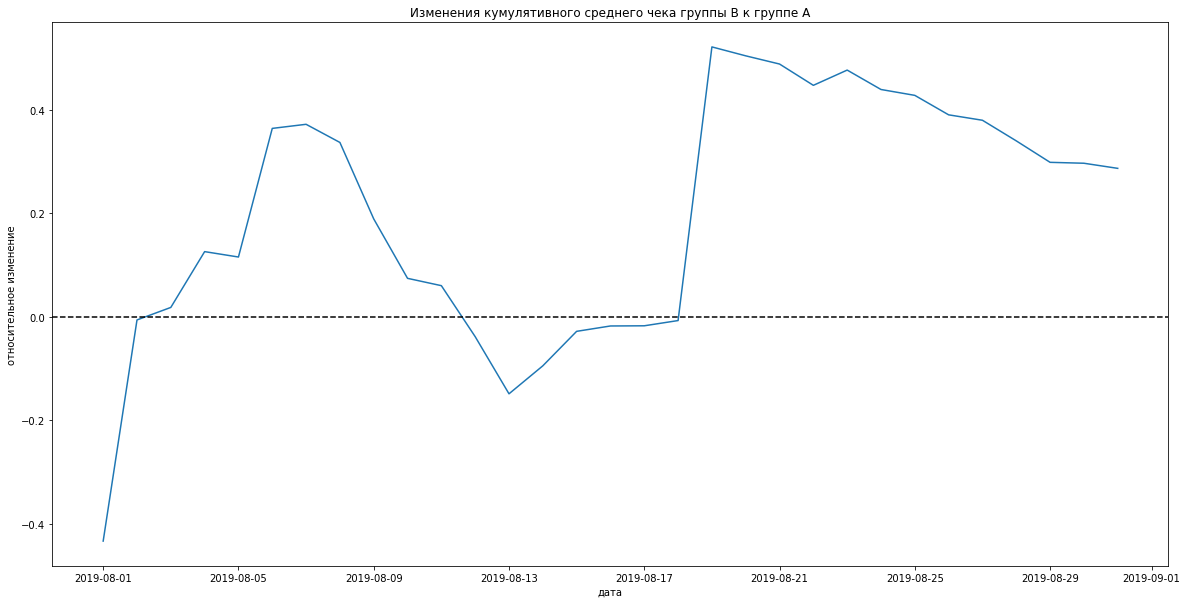

In [11]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.show()

### График кумулятивного среднего количества заказов на посетителя по группам

На графике видно что в начале эксперимента был скачек количества заказов на посетителя в обеих группах. При этом группа А имела более высокий показатель. Но затем в обеих группах произошел резкий спад. При этом среднее количество заказов на посетителя в группе А продолжает снижаться. В то время как среднее количество заказов на посетителя в группе В снова имело резкий рост и имеет стабильно более высокий показатель чем группа А.

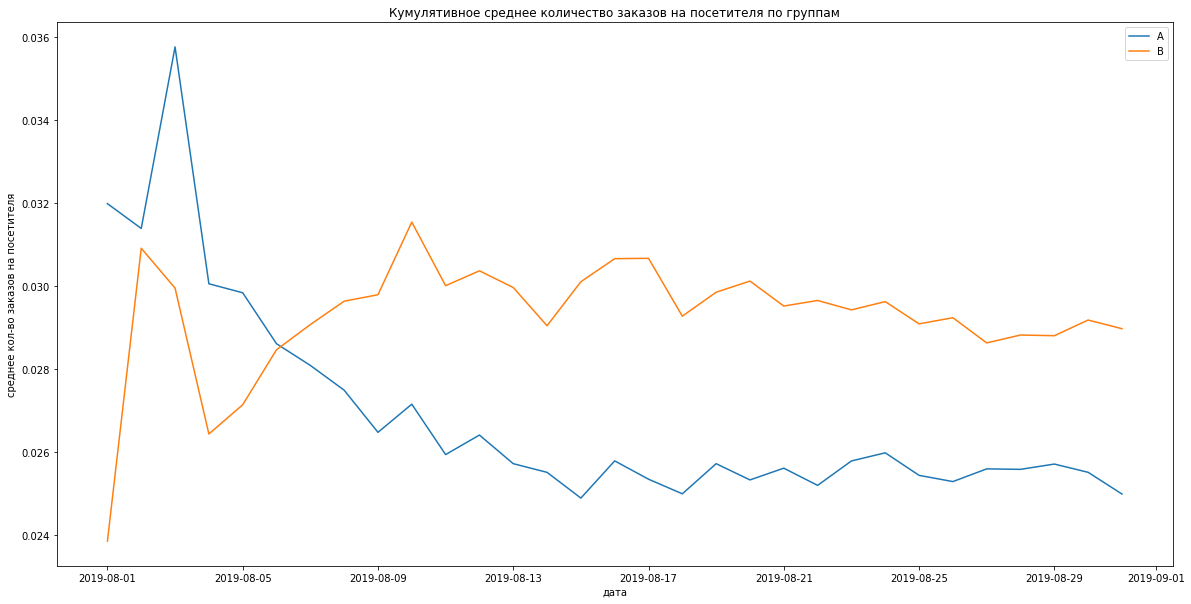

In [12]:
plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.legend() 
plt.xlabel('дата')
plt.ylabel('среднее кол-во заказов на посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.show()

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Мы видим что среднее количество заказов на посетителя группы В почти с самого начала эксперимента выше среднее количество заказов на посетителя в группе А. В определенные моменты различия достигали 20%, затем конверсия в группе В немного просела, но осталась выше чем в группе А.

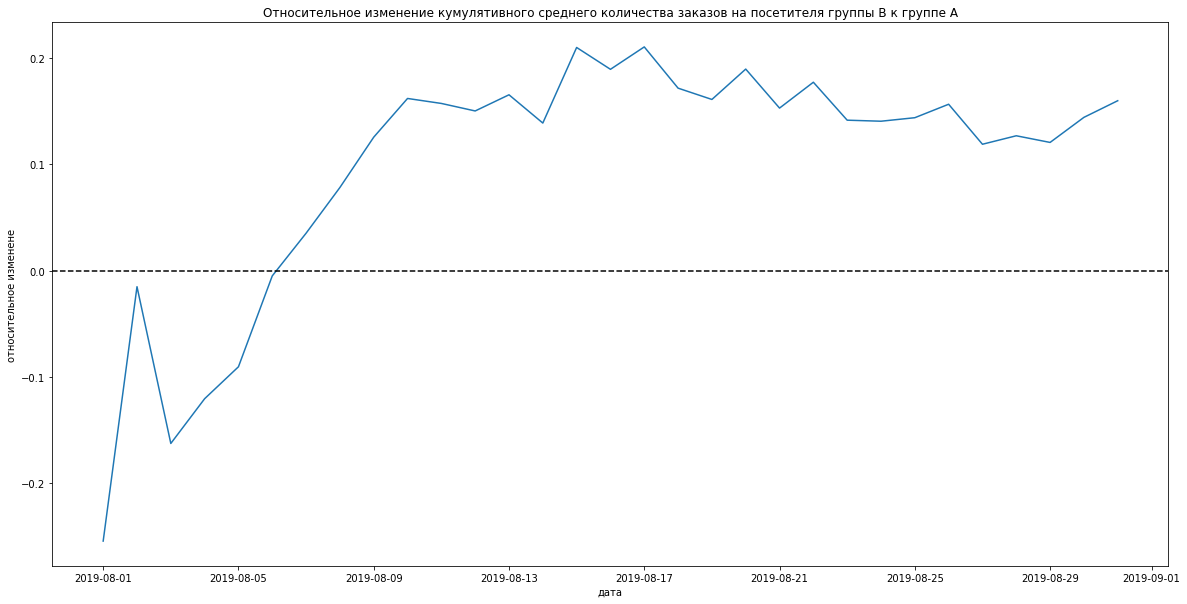

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('дата')
plt.ylabel('относительное изменене')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

### Точечный график количества заказов по пользователям

 На точечном графике мы видим, что пользователей сделавших болек 2-х заказов совскм не много. 

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


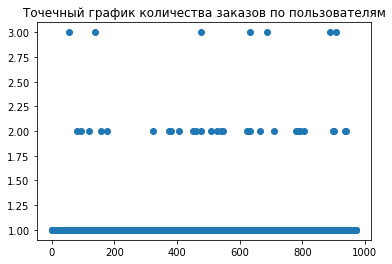

In [14]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.show()

### 95-й и 99-й перцентили количества заказов на пользователя

Посчитав перцентиль мы видим что не более 5% пользователей совершили больше 2 заказов. И не больше 1% пользователей совершили более 4 заказов. За границу для фильтра аномалий примим количество заказов более 2.

In [15]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


### Точечный график стоимостей заказов

Мы видим что большая часть чеков не превышала суммой 20000 рублей. Но так же мы можем заметить выбросы на сумму свыше 120000 рублей.

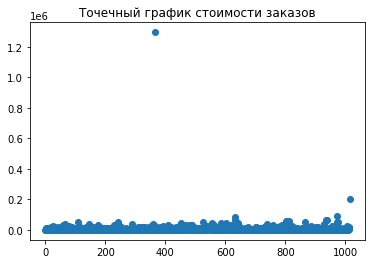

In [16]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.show()

### 95-й и 99-й перцентили стоимости заказов

Посчитав процентили мы видим что не более 5% чеков оформлены на сумму более 28000 рублей. И не более 1% на сумму Более 58233 рублей. За границу для фильтра аномалий примем стоимость заказов свыше 28000 рублей

In [17]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Гипотезы:

Нулевая:среднее количества заказов на пользователя в группе А по "сырым" = среднему количеству заказов на посетителя в группе В по "сырым" данным и средний чек в группе А по "сырым" данным = среднему чеку в группе В по "сырым" данным;

Альтернативная: среднее количество заказов на пользователя в группе А по "сырым" данным != среднего количества заказов на пользователя в группе В по "сырым" данным и средний чек в группе А по "сырым" != среднего чека в группе В по "сырым" данным;

Статистический критерий: Так как в данных имеются большие выбросы, алгебраические метрики работают плохо, так как даже одно выбивающееся значение существенно влияет на результат. Поэтому мы воспользуемся непараметрическим тестом Манна-Уитни.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Мы видим что Р-value меньше 0.05. Но прежде чем делать выводы посмотрим другие показатели. Анализ сырых данных показал, что среднее количество заказов между группами есть статистически значимое различие. Относительный прирост среднего группы В к группе А равен 13,8%.

In [18]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('относительная разница:',"{0:.5f}".format((visitors[visitors['group'] == 'B']['visitors'].sum()/visitors[visitors['group'] == 'B']['visitors'].sum())/(visitors[visitors['group'] == 'A']['visitors'].sum()/visitors[visitors['group'] == 'A']['visitors'].sum())-1))

p-value: 0.01102
относительная разница: 0.00000


### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

P-value больше 0.05, статически значимых различий между средними чеками нет. Относительное различие среднего чека 28,7%

In [19]:
print('p-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительная разница:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
относительная разница: 0.287


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

 Как и в случае с сырыми данными статистическая значимость достигнута. Группа В лучше группы А по среднему количеству заказов на посетителя.

In [20]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Абсолютные потери составили 55 пользователя.

Относительные потери -  0.05653.

In [21]:
print(abnormalUsers.nunique())
orders1=orders['visitorId']
print(orders1.nunique())
print(round((abnormalUsers.nunique()/orders1.nunique()),5))

55
973
0.05653


In [22]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum()- len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('p-value:','{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.00945
относительная разница: 0.189


Гипотезы:

Нулевая:среднее количества заказов на пользователя в группе А по "очищенным" данным = среднему количеству заказов на посетителя в группе В по "очищенным" данным и средний чек в группе А по "очищенным" данным = среднему чеку в группе В по "очищенным" данным;

Альтернативная: среднее количество заказов на пользователя в группе А по "очищенным" данным != среднего количества заказов на пользователя в группе В по "очищенным" данным и средний чек в группе А по "очищенным" != среднего чека в группе В по "очищенным" данным;

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Появилась статистическая значимость между группами В и А по среднему чеку.

In [23]:
print('p-value:'
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительная разница:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value:0.762
относительная разница: -0.022


## Вывод:

Остановить тест и признать победу группы В. Так как по результатам теста была достигнута статистическая значимость в показателях по среднему чеку и по среднему количеству покупок на посетителя.